In [16]:
from PIL import Image, ImageDraw

# Create a new image with a white background
image = Image.new('RGB', (400, 300), 'white')

# Initialize ImageDraw
draw = ImageDraw.Draw(image)

# Draw a rectangle
draw.rectangle([100, 75, 300, 225], fill='blue')

# Save the image
image.save('generated_image.png')

# Display the image
image.show()


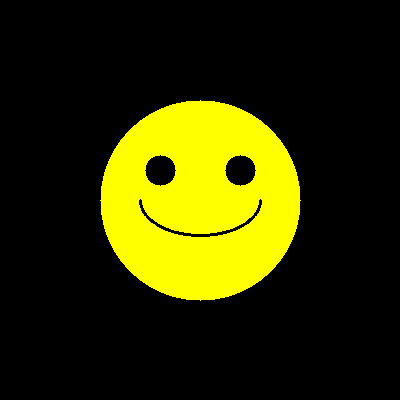

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Create a black image
image = np.zeros((400, 400, 3), np.uint8)

# Draw a yellow circle for the face
cv2.circle(image, (200, 200), 100, (0, 255, 255), -1)

# Draw eyes
cv2.circle(image, (160, 170), 15, (0, 0, 0), -1)
cv2.circle(image, (240, 170), 15, (0, 0, 0), -1)

# Draw a smile
cv2.ellipse(image, (200, 200), (60, 35), 0, 0, 180, (0, 0, 0), 2)

# Display the image
cv2_imshow(image)


In [14]:
!pip install CLIP

1/1 [==============================] - 0s 89ms/step


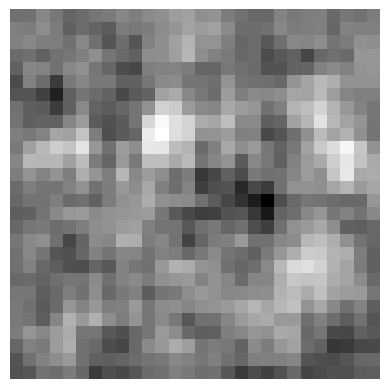

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D
from tensorflow.keras.layers import LeakyReLU, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load and preprocess the Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

# Define the generator model
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define a function for generating images
def generate_image():
    noise = np.random.normal(0, 1, (1, 100))
    generated_image = generator.predict(noise)

    # Display the generated image
    plt.imshow(generated_image[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage of the function
generate_image()


In [19]:
import requests

# Prompt the user to describe the image
user_input = input('Describe the image you want to generate: ')

# Use the DeepAI image generation API to generate an image based on user input
response = requests.post(
    "https://api.deepai.org/api/text2img",
    data={
        'text': user_input,
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

if response.status_code == 200:
    result = response.json()
    if 'output_url' in result:
        print("Generated image:")
        print(result['output_url'])
    else:
        print('Failed to generate the image. Please try again with a different description.')
else:
    print('Failed to generate the image. Please try again with a different description.')


Describe the image you want to generate: Human
Generated image:
https://api.deepai.org/job-view-file/22a2dbac-d02a-45dc-839d-b1ae0e6216a1/outputs/output.jpg
